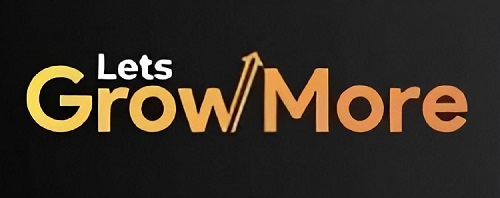

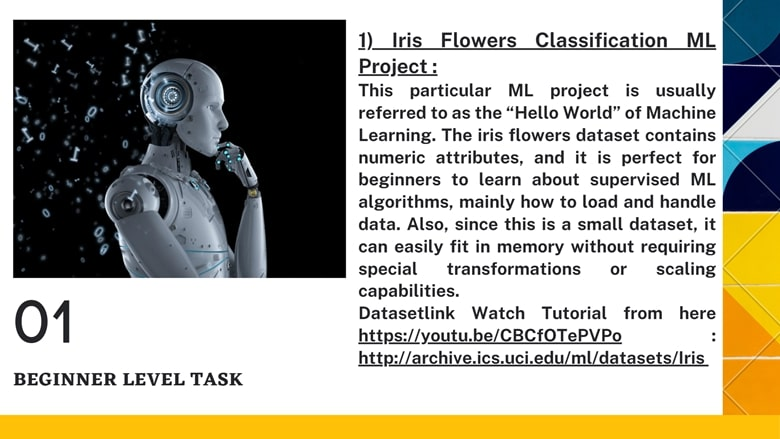

***BY: DURGA MUKESH***

# INTRODUCTION:
## Problem Statement:
This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features.

## About the Dataset:
This is perhaps the best known database to be found in the pattern
recognition literature.  Fisher's paper is a classic in the field
and is referenced frequently to this day.  (See Duda & Hart, for
example.)  The data set contains 3 classes of 50 instances each,
where each class refers to a type of iris plant.  One class is
linearly separable from the other 2; the latter are NOT linearly
separable from each other.

--------------------------------
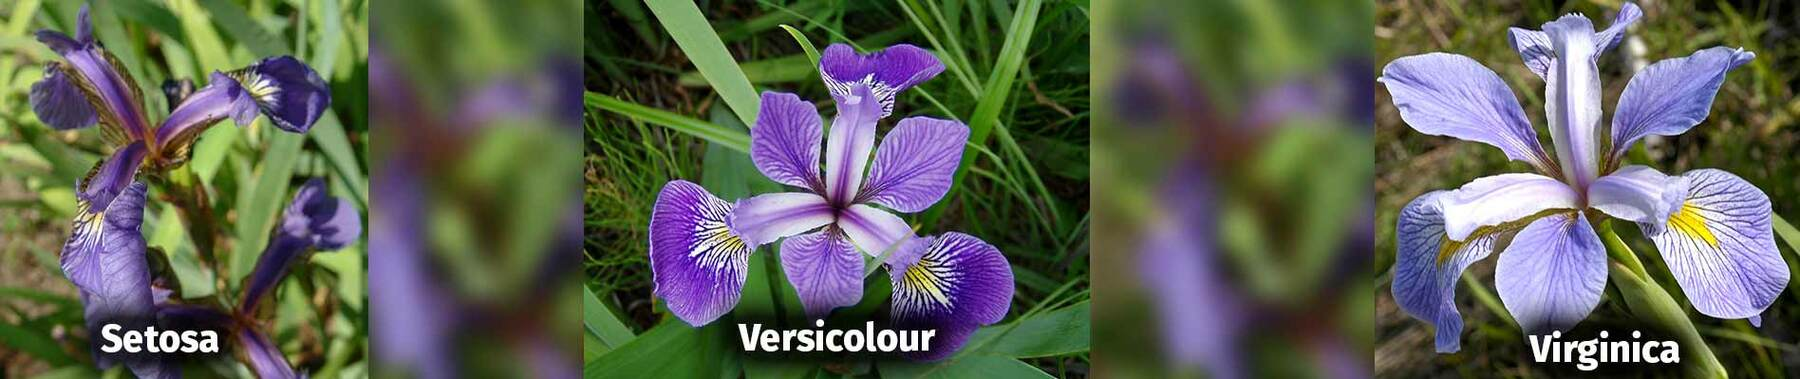

--------------------

* Predicted attribute: class of iris plant.

* This is an exceedingly simple domain.

* This data differs from the data presented in Fishers article (identified by Steve Chadwick,  spchadwick@espeedaz.net )

* The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature.

* The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.  

* Number of Instances: 150 (50 in each of three classes)

* Number of Attributes: 4 numeric, predictive attributes and the class

* Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      * Iris Setosa
      * Iris Versicolour
      * Iris Virginica
      
* Missing Attribute Values: None

* Summary Statistics:
    
  Attributes   | Min  | Max | Mean | SD   | Class Correlation
  -------------|:----:|:---:|:----:|:----:|:-----------------:
  sepal length |4.3   | 7.9 | 5.84 | 0.83 | 0.7826     
  sepal width  |2.0   | 4.4 | 3.05 | 0.43 |-0.4194  
  petal length |1.0   | 6.9 | 3.76 | 1.76 | 0.9490  (high!)
  petal length |0.1   | 2.5 | 1.20 | 0.76 | 0.9565  (high!)
  
  
* Class Distribution: 33.3% for each of 3 classes.


In [1]:
# Importing necessary modules
import numpy as np # linear algebra
import pandas as pd # data processing, reading data
import seaborn as sns # Data Analysis
sns.set(style="white", color_codes=True)
import pickle
import matplotlib.pyplot as plt # Data Analysis
%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

from sklearn import preprocessing #Data Standardization
from sklearn.model_selection import train_test_split #Feature Extraction
from sklearn.preprocessing import StandardScaler #Data Standardization
from sklearn.linear_model import LogisticRegression #Model Training
from sklearn.metrics import confusion_matrix #model creation
from sklearn.metrics import classification_report #model creation
from sklearn.metrics import accuracy_score #model creation
from sklearn.neighbors import KNeighborsClassifier #Model Training 
from sklearn.svm import SVC #Model Training
from sklearn.cluster import KMeans #Model Training
from sklearn.tree import DecisionTreeClassifier, plot_tree #Model Training
from sklearn.ensemble import RandomForestClassifier #Model Training

# Data Analysis:

In [2]:
#Column names: 
col_names = ['sepal-length','sepal-width','petal-length','petal-width','species']

# reading the dataset into the data frame
df = pd.read_csv("iris_dataset.csv", names = col_names) # if the dataset is in the same folder as the .ipynb notebook

#loading the iris dataset
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
df.head() # glimpse of dataset

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail(7)

,sepal-length,sepal-width,petal-length,petal-width,species
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
# dataset description
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.dtypes # checking datatypes of each column

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
species          object
dtype: object

In [9]:
df['species'].value_counts() #number of species

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

**The species data are balanced, and there are no missing values.**

In [10]:
df.ndim

2

In [11]:
df.isna().sum() # checking for null values/ Detect missing values

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

In [12]:
df.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width',
       'species'],
      dtype='object')

In [13]:
df.max() # checking for max value of each column

sepal-length               7.9
sepal-width                4.4
petal-length               6.9
petal-width                2.5
species         Iris-virginica
dtype: object

In [14]:
df.min()# checking for min value of each column

sepal-length            4.3
sepal-width             2.0
petal-length            1.0
petal-width             0.1
species         Iris-setosa
dtype: object

In [15]:
#Checking for Duplicate values
print(df.duplicated().sum())
df[df.duplicated()]

3


,sepal-length,sepal-width,petal-length,petal-width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are three Duplicates, but as their deletion will lead to dataset imbalance, we will not drop them.

**Dataset Loading, checking for missing values and incorrect data formats is done.**
**The data set is free of missing values and incorrect data formats.**

# Exploratory Data Analysis (EDA):

## Scatter Plot:
**Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.**

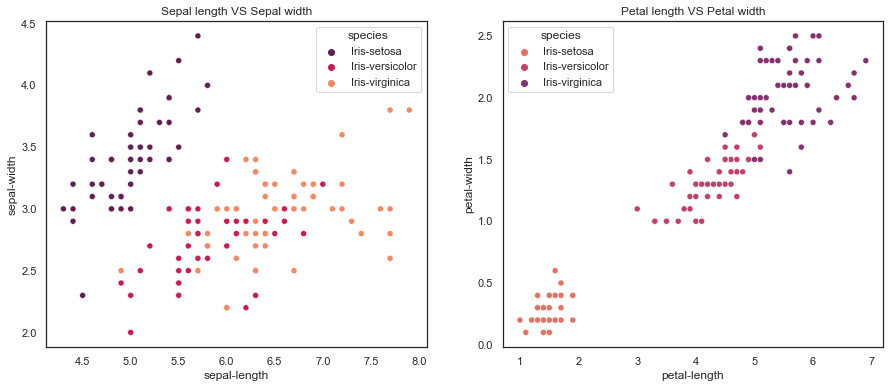

In [16]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.scatterplot(ax=ax[0],x="sepal-length",y="sepal-width",hue='species',data=df, palette = "rocket")
sns.scatterplot(ax=ax[1],x="petal-length",y="petal-width",hue='species',data=df, palette="flare")
ax[0].set_title("Sepal length VS Sepal width")
ax[1].set_title("Petal length VS Petal width")
plt.show()

**Observations:**

From the first plot, we see that
* "Iris-setosa" has smaller sepal_length and greater sepal_width
* "Iris-versicolor" has a everage sepal_length and sepal_width
* "Iris-virginica" has greater sepal_length and smaller sepal_width

---------------------------------------------------------------
From the second plot, we see that
* "Iris-setosa" has smaller petal_length and smaller sepal_width
* "Iris-versicolor" has a average petal_length and petal_width
* "Iris-virginica" has greater petal_length and greater petal_width



## Bar Plot:
**A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories.**

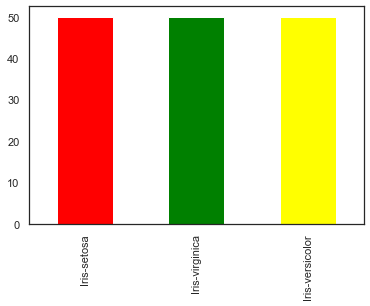

In [17]:
df['species'].value_counts().plot(kind='bar', color=['red', 'green', 'yellow'])
plt.show()

## **Violin plot:**

**A violin plot plays a similar activity that is pursued through whisker or box plot do. As it shows several quantitative data across one or more categorical variables. It can be an effective and attractive way to show multiple data at several units.**

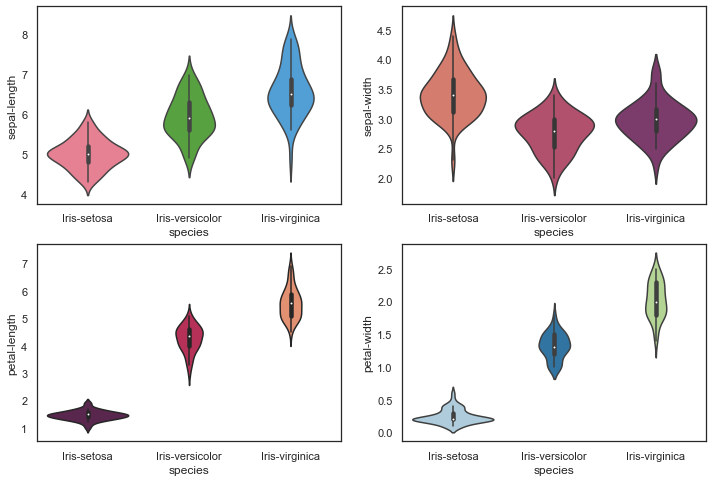

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal-length', data=df, palette = "husl")
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal-width', data=df, palette="flare" )
plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal-length', data=df, palette = "rocket")
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal-width', data=df, palette = "Paired")
plt.show()

## Pair Plot:
**To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.
Plot pairwise relationships in a dataset.**

**By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.**

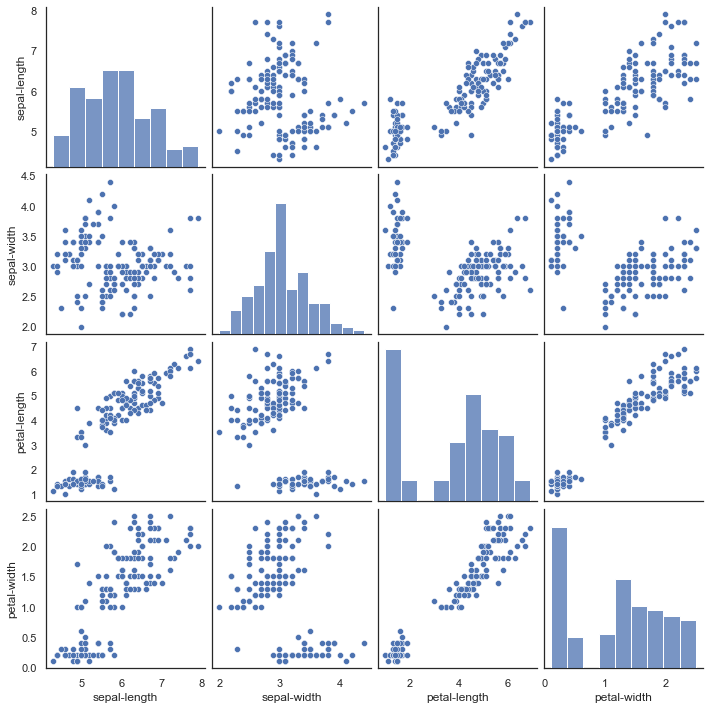

In [19]:
sns.pairplot(df)
plt.show()

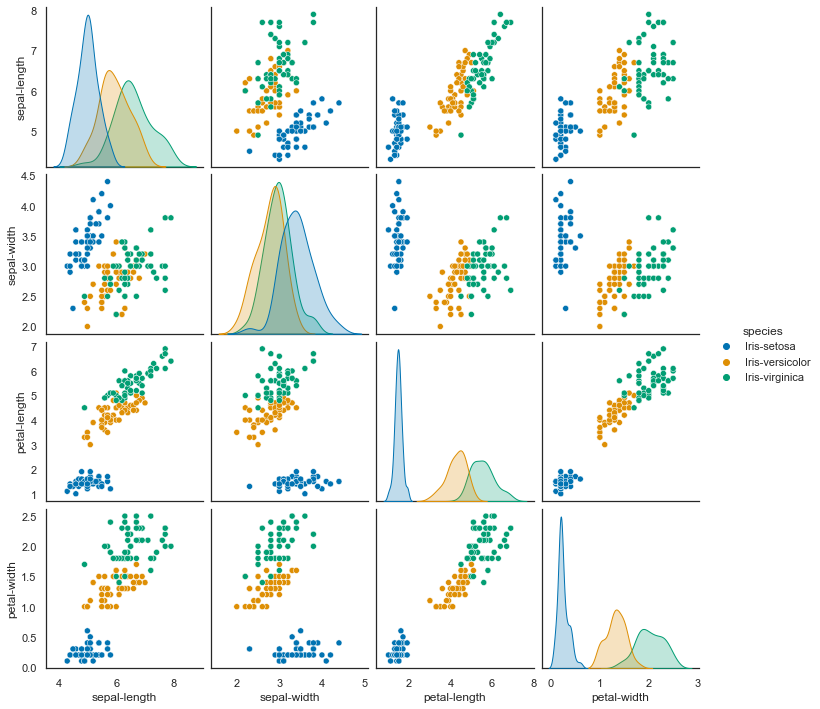

In [20]:
sns.pairplot(df,hue = "species", palette="colorblind")
plt.show()

## Histogram:
**A histogram is a great tool for quickly assessing a probability distribution that is intuitively understood by almost any audience. Python offers a handful of different options for building and plotting histograms. Most people know a histogram by its graphical representation, which is similar to a bar graph:**

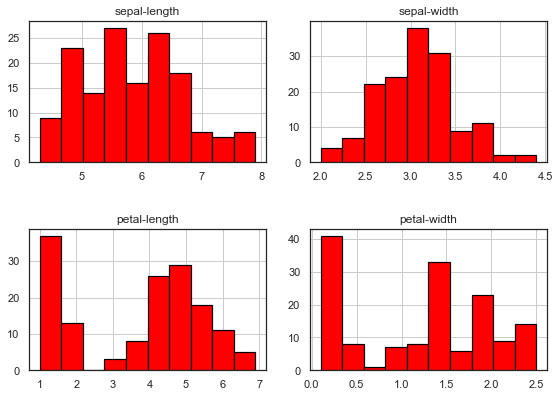

In [21]:
df.hist(edgecolor='black', linewidth=1.2,color='red')
fig = plt.gcf()
plt.tight_layout()
fig.set_size_inches(8,6)

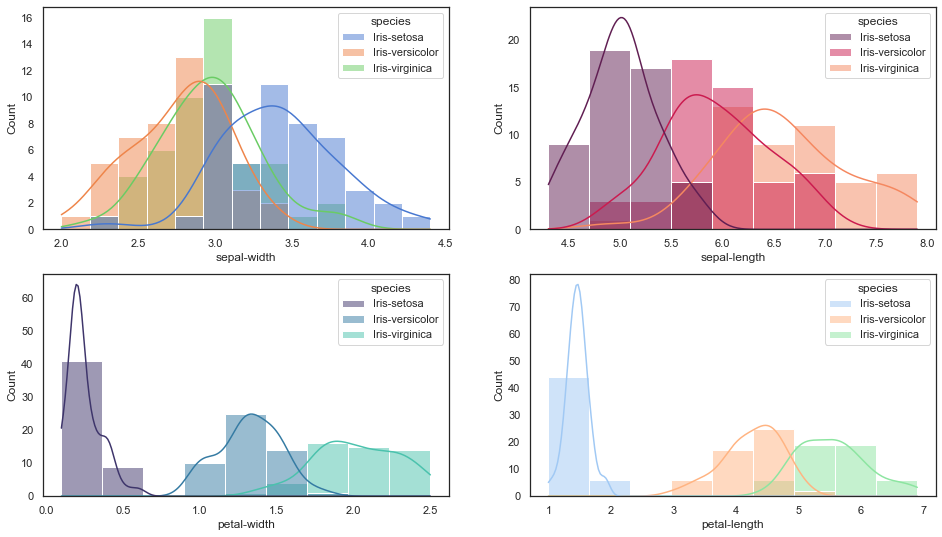

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.histplot(ax = axes[0,0],data=df,x ='sepal-width',hue='species',kde=True,palette="muted")
sns.histplot(ax = axes[0,1],data=df,x ='sepal-length',hue='species',kde=True,palette="rocket")
sns.histplot(ax = axes[1,0],data=df,x ='petal-width',hue='species',kde=True,palette="mako")
sns.histplot(ax = axes[1,1],data=df,x ='petal-length',hue='species',kde=True,palette="pastel")
plt.show()

## Correlation:
The corr() method calculates the relationship between each column in your data set.

The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

* 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

* 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

* -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

* 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.


In [23]:
df.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


In [24]:
df.corr().style.background_gradient(cmap='plasma').set_precision(2)

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.00,-0.11,0.87,0.82
sepal-width,-0.11,1.00,-0.42,-0.36
petal-length,0.87,-0.42,1.00,0.96
petal-width,0.82,-0.36,0.96,1.00


### Heat Map:
**A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.**

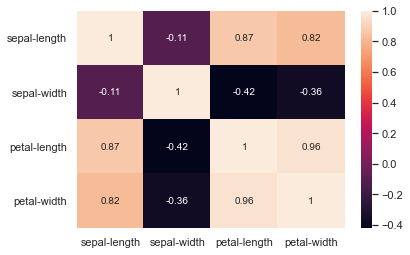

In [25]:
plt.figure() 
sns.heatmap(df.corr(),annot=True)
plt.show()

**Conclusions drawn from EDA:**
1. The dataset choosen is balanced, as there are equal number of records in all the three species.
2. We have four numerical columns and one is just a categorical column,  which is our target variable.
3. Strong correlation is present in between the petal length and petal width as the value of correlaton is 0.96.
4. The Iris-setosa species are most distinguishable because it sepeartes itself from other features because of its small size.
5. The Versicolor and Virginica species are usually mixed and are sometimes hard to separate. While usually Versicolor has average feature sizes, virginica has larger feature sizes.
6. We do have some outliers and duplicates but we just have 150 records, and outliers are not putting a big impact. So we have not wrangled them.

# Label Encoders:

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. To make the data understandable or in human readable form, the training data is often labeled in words.

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.


In [26]:
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['species']= le.fit_transform(df['species'])
  
df['species'].unique()

array([0, 1, 2])

In [27]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Feature Selection:

In [29]:
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into training and testing datasets:

In [30]:
# Splitting the dataset into the Training and Testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True,random_state = 5)
# Here: traiining dataset = 70% and testing dataset = 30%

# Data Standardisation:
1. Data standardization is the process of converting data to a common format to enable users to process and analyze it.
2. Data standardization means your data is internally consistent — each of your data sources has the same format and labels. When your data is neatly organized with logical descriptions and labels, everyone in your organization can understand it and put it to use.
3. The purpose of data standardization is to make your data consistent and clear. Consistent is ensuring that the output is reliable so that related data can be identified using common terminology and format.
4. In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values.

In [31]:
#feature Scaling      
std_x= StandardScaler()    
X_train= std_x.fit_transform(X_train)   
X_test= std_x.transform(X_test)

* transform() - the parameters learned by our model using the training data will help us to transform our test data.

# Model Creation- Using Supervised ML Models:
We don’t know which algorithms would be best for this problem. SO we will be checking each algorithm in loop and print its accuracy, so that we can select our best algorithm. Let’s test 4 different algorithms:

* Logistic Regression (LR)
* Random Forest Classifier
* Support Vector Machines (SVM).
* K-Nearest Neighbors (KNN).

## Logistic Regression Model(LR)

* Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis used to solve classification problems. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

* Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

In [32]:
#Fitting Logistic Regression to the training set  
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Our model is well trained on the training set, so we will now predict the result by using test set data.

In [33]:
# Predicting the test dataset result
y_pred = classifier.predict(X_test)

We have created a y_pred vector to predict the test set result in the above code.

In [34]:
y_pred

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

* *A **classification report** is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.*

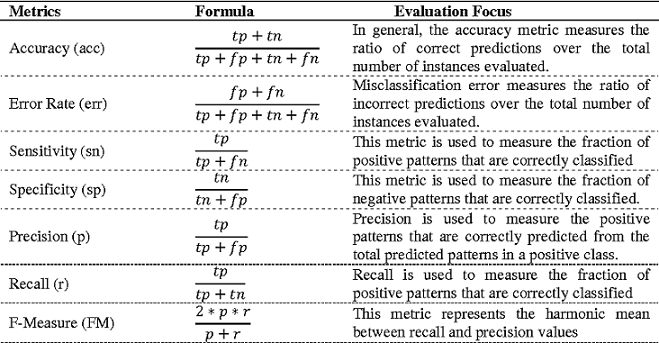

In [35]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



* A **Confusion matrix** is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

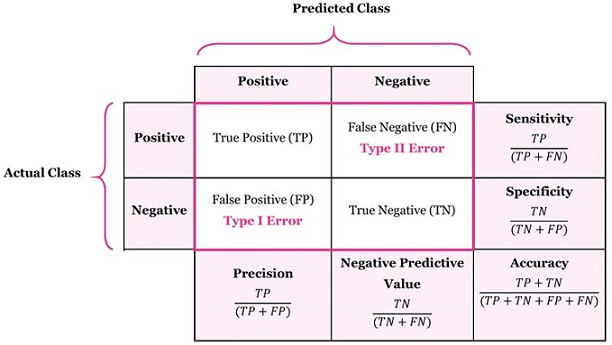

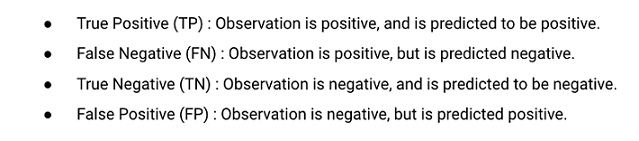
***False Positive(FP) - is known as the Type 1 error.***

***False Negative(FN) - is known as the Type 2 error.***

In [36]:
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]


We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that:

Main diagonals (13,15,9) gives the correct predictions.That is, the cases where the actual values and the model predictions are the same.

In [37]:
# Accuracy of the model
acc1=round(accuracy_score(y_pred,y_test)*100,2)
print('Accuracy for LR is',acc1,"%")

Accuracy for LR is 92.11 %


## Random Forest Classifier:
It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, **"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."**

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

**The Working process can be explained in the below steps and diagram:**

**Step-1:** Select random K data points from the training set.

**Step-2:** Build the decision trees associated with the selected data points (Subsets).

**Step-3:** Choose the number N for decision trees that you want to build.

**Step-4:** Repeat Step 1 & 2.

**Step-5:** For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

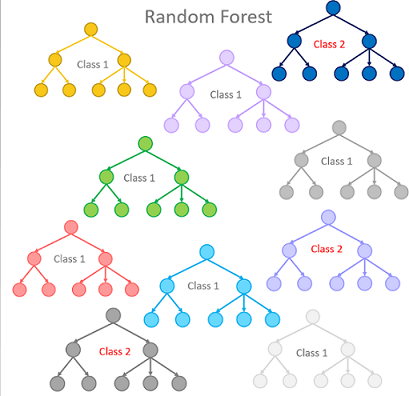

In [38]:
classifier_1 = RandomForestClassifier(n_estimators= 10, criterion="entropy")

In the above code, the classifier object takes below parameters:

* n_estimators= The required number of trees in the Random Forest. The default value is 10. We can choose any number but need to take care of the overfitting issue.
* criterion= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

In [39]:
y_pred1 = classifier.predict(X_test)

In [40]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [41]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred1))

[[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]


In [42]:
#Accuracy of the model
acc2=round(accuracy_score(y_pred1,y_test)*100,2)
print('Accuracy of Random Forest is',acc2,"%")

Accuracy of Random Forest is 92.11 %


## K-Nearest Neighbour Classifier(KNN):

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
* K-NN is a **non-parametric algorithm**, which means it does not make any assumption on underlying data.
* It is also called a **lazy learner algorithm** because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
* This algorithm is used to make predictions for a new data point by considering its closest neighbor(s) in the training set. This is implemented in the KNeighborsClassifier class, which contains the algorithm that builds the model as well as the algorithm that makes a prediction using the model.

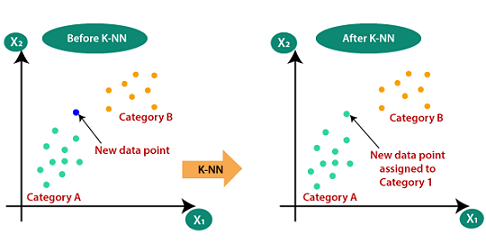

**Working of KNN Algorithm:**
K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. 

The following steps will help us understand the working:

1. We must load the training as well as test data from the loaded dataset.
2. We need to choose the value of K (the nearest data points). It can be any integer.
3. * Calculate the distance between test data and each row of training data with the help of any of the method namely: **Euclidean, Manhattan or Hamming distance**. *The most **commonly used method** to calculate distance is **Euclidean**.*
* Based on the distance value, sort them in ascending order.
* It (the algorithm) will choose the top K rows from the sorted array.
* It will assign a class to the test point based on most frequent class of these rows.
4. Our Model is ready.

In [43]:
#Fitting K-NN classifier to the Training data
classifier_2=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier_2.fit(X_train,y_train)

KNeighborsClassifier()

* ***n_neighbors***: To define the required neighbors of the algorithm. Usually, it takes 5.
* ***metric='minkowski'***: This is the default parameter and it decides the distance between the points.
* ***p=2***: It is equivalent to the standard Euclidean metric.


In [44]:
#Predicting the test set result  
y_pred2= classifier_2.predict(X_test)

In [45]:
y_pred2

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [46]:
print('Accuracy of KNN is',accuracy_score(y_pred2,y_test)*100,"%")

Accuracy of KNN is 94.73684210526315 %


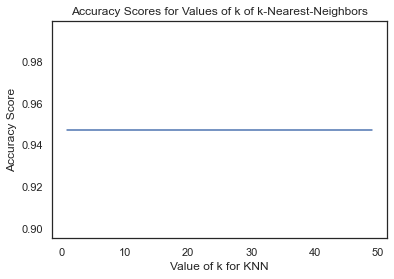

In [47]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(pd.Series(accuracy_score(y_pred2,y_test)))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [48]:
classifier_3=KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2 )
classifier_3.fit(X_train,y_train)
prediction= classifier_3.predict(X_test)  

In [49]:
# Accuracy of the model
acc3=round(accuracy_score(prediction,y_test)*100,2)
print('Accuracy of KNN is',acc3,"%")

Accuracy of KNN is 97.37 %


In [50]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [51]:
print(confusion_matrix(y_test, y_pred2))

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


## Support Vector Machine(SVM):
* “Support Vector Machine” (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However, it is mostly used in classification problems. 
* Support vector machines are a set of supervised learning methods used for classification, regression, and outliers detection. All of these are common tasks in machine learning.
* In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

**HOW DOES SVM WORK?**
A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.

**STEPS:**
* Import the dataset
* Explore the data to figure out what they look like
* Pre-process the data
* Split the data into attributes and labels
* Divide the data into training and testing sets
* Train the SVM algorithm
* Make some predictions
* Evaluate the results of the algorithm

In [52]:
classifier_4 = SVC(random_state=5)  
classifier_4.fit(X_train, y_train)

SVC(random_state=5)

In [53]:
#Predicting the test set result  
y_pred4 = classifier_4.predict(X_test)

In [54]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [55]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred4))

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


In [56]:
# Accuracy of the model
acc4=round(accuracy_score(y_pred4,y_test)*100,2)
print('Accuracy of SVM is',acc4,"%")

Accuracy of SVM is 94.74 %


# Deciding which is the Best Model:

In [57]:
results = pd.DataFrame({
    'Models': ['Logistic Regression', 
               'Random Forest',
               'K-Nearest Neighbours',
               'Support Vector Machine (SVM)'],
    "Accuracy-score":[acc1,
                      acc2,
                      acc3,
                      acc4,
                     ]})
result_df = results.sort_values(by='Accuracy-score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()

,Models,Accuracy-score
0,K-Nearest Neighbours,97.37
1,Support Vector Machine (SVM),94.74
2,Logistic Regression,92.11
3,Random Forest,92.11


In [58]:
results['Accuracy-score']

0    92.11
1    92.11
2    97.37
3    94.74
Name: Accuracy-score, dtype: float64

***Hence, KNN has the Highest Accuracy rate- 97.37%, followed by SVM-94.74%***

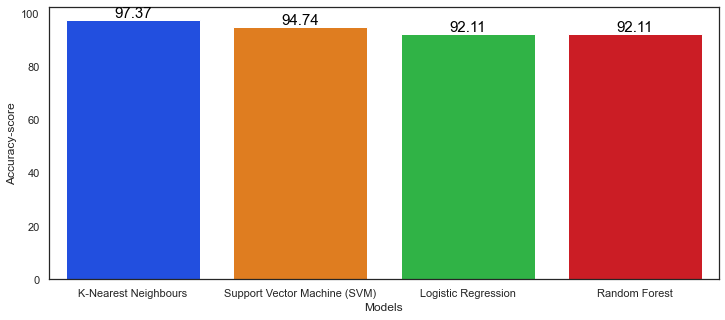

In [59]:
#Plotting a graph of teh Accuracies of the models:
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Models',y="Accuracy-score",data=result_df, palette = "bright")
labels = (result_df["Accuracy-score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

# Conclusion:
We have just implemented some of the basic data preparation and exploration steps, followed by Exploratory Data Analysis and a few common Machine Learning Algorithms on the iris dataset.

**THANK YOU**